# What is it that people want to learn about in data science? #

One way to answer this question is by looking throught the **datascience stack exchange platform.**
The platform welcomes any question related to datascience. The questioned are classified by newest, active, unanswered and more. Tags are also listed for the user to search questions based on certain topics in order of popularity.

Each question has a title and description with snippets of problem code. The questions are also tagged. **Tags** seem to be the easiest way of determining what questions do datascience learners ask.


### Tables we can focus on to get results relevent to popular DataScience Topics ###

The Tags Table, Comments and Post Tables have some good data on Popular questions and user engagement.

In [2]:
import pandas as pd
dsq= pd.read_csv('2019_questions.csv', parse_dates = ["CreationDate"])

## Data Cleaning ##

**How many missing values in each column?**

In [3]:
dsq.isnull().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

Favourite count has 7432 nulls which means users did not favourite the question so we can replace the null values with 0.

In [4]:
dsq.fillna(0, inplace= True)

**Checking DataTypes of each column**

In [5]:
dsq.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount           float64
dtype: object

FavoriteCount must be int type as counts are whole numbers. We will convert it to int in the next cell:

In [6]:
dsq["FavoriteCount"]= dsq["FavoriteCount"].astype(int)

Cleaning up the Tags column to a more readable format.

In [7]:
dsq["Tags"] = dsq["Tags"].str.replace('<','')
dsq["Tags"] = dsq["Tags"].str.replace('>',';')

## Top Tags in Usage, and Views ##

**Counting the number of times each tag was used**

In [8]:
tagname = []
t = []
# Making a list of all tags including repeats
for tag in dsq["Tags"]:
    t = tag.split(';')
    for i in range(0, len(t)):
        if t[i] != '':
            tagname.append(t[i])
#copying a list into a DF
tag_count = pd.DataFrame(tagname, columns = ["tagname"])

#Grouping by tags, counting them and copying tagnames and counts to a new DF

tag_c = pd.DataFrame({"count" : tag_count.groupby("tagname").size() })
tag_c.sort_values('count', ascending = False, inplace = True)
tag_c = tag_c.reset_index()
tag_c
    

,tagname,count
0,machine-learning,2693
1,python,1814
2,deep-learning,1220
3,neural-network,1055
4,keras,935
5,classification,685
6,tensorflow,584
7,scikit-learn,540
8,nlp,493
9,cnn,489


**Counting Views for each tag**

We will now create a dictionary *tag_vc* which will contain tags as keys and viewcounts as values. We will then map it to our tag_c dataframe.

In [9]:
tag_vc = {}
dsq["Tags"] = dsq["Tags"].str.split(';')
for index,row in dsq.iterrows():
    for tag in row["Tags"]:
        if tag in tag_vc:
            tag_vc[tag] += row["ViewCount"]
        else:
            tag_vc[tag] = row["ViewCount"]
            
tag_c["view_count"] = tag_c['tagname'].map(tag_vc)
    

In [10]:
tag_top_count = tag_c.sort_values(by="count").tail(20)
tag_top_viewcount = tag_c.sort_values(by="view_count").tail(20)


**Separating Top 20 views and counts to different dataframes for plotting**

In [11]:
tag_top_count["count"] = tag_top_count["count"].astype(int)
tag_top_viewcount["view_count"] = tag_top_viewcount["view_count"].astype(int)

## Plotting Results of Top 20 Tag Views and Top 20 Tag Counts ##

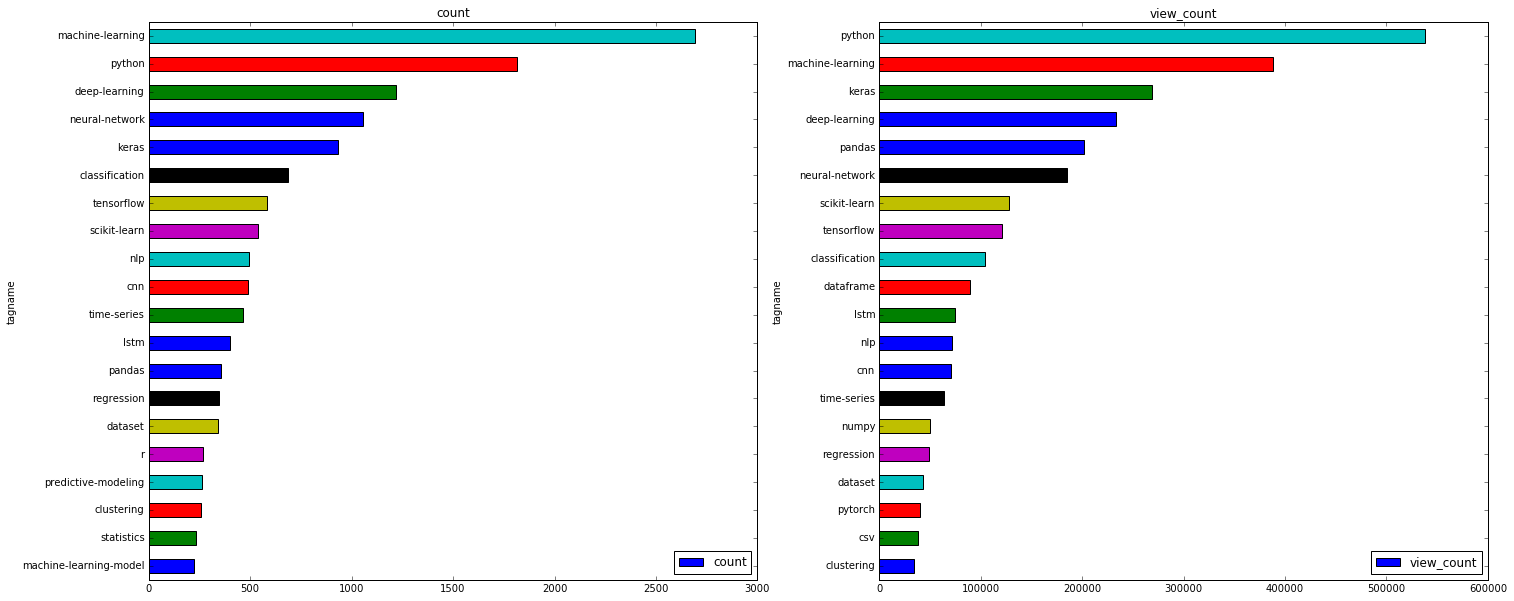

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(nrows = 1, ncols =2)
fig.set_size_inches(24,10)
tag_top_count.plot(kind='barh', y="count", x="tagname", ax=axes[0], subplots=True)
tag_top_viewcount.plot(kind='barh', y="view_count", x="tagname", ax=axes[1], subplots=True)
plt.show()


## Relationship between Tags ##

In [13]:
missing_tags = pd.merge(tag_top_count[['tagname','count']], tag_top_viewcount[['view_count']], how='left', left_index=True, right_index=True)
missing_tags

,tagname,count,view_count
19,machine-learning-model,224,NaN
18,statistics,234,NaN
17,clustering,257,33928.0
16,predictive-modeling,265,NaN
15,r,268,NaN
14,dataset,340,43151.0
13,regression,347,49451.0
12,pandas,354,201787.0
11,lstm,402,74458.0
10,time-series,466,64134.0


r, predictive-modeling, statistics and machine learning model are missing from top 20 counts.

In [14]:
missing_tags = pd.merge(tag_top_viewcount[['tagname','view_count']], tag_top_count[['count']], how='left', left_index=True, right_index=True)
missing_tags

,tagname,view_count,count
17,clustering,33928,257.0
148,csv,38654,NaN
26,pytorch,40240,NaN
14,dataset,43151,340.0
13,regression,49451,347.0
46,numpy,49767,NaN
10,time-series,64134,466.0
9,cnn,70349,489.0
8,nlp,71382,493.0
11,lstm,74458,402.0


csv, pytorch, numpy and dataframe are missing from top 20 viewcounts.

The indexing on the second merged table tells us that the top 10 have solid positions in both lists. The tags are:
- Machine Learning
- python
- deep-learning
- neural-network
- keras
- tensorflow
- classification
- scikit-learn
- nlp
- cnn
- time-series

Now looking at the definitions of these tags on https://datascience.stackexchange.com/tags , we can deduce that deep-learning and machine-learning are largely similar with the former being a nuanced branch of machine learning. Let's take a close look at deep-learning questions and the interest in the topic.

## Is it a fad? ##

To answer this question we will have to compare all questions with deep-learning related tags asked every quarter starting from 2014 to 2019- month with the total questions asked each quarter. This will give us a clearer picture about the poularity of deep-learning related questions.

In [15]:
allq = pd.read_csv('all_questions.csv', parse_dates = ['CreationDate'])
allq['Tags'] = allq['Tags'].str.replace('^<|>$', '').str.split('><')


### What is Deep Learning? ###

A simple lookup on google about deep-learning libraries return the following names: TensorFlow, Keras, Scikit-learn. Neural-networks is a branch of Deep-Learning. Also - cnn is a classification of neural networks. We can consider any question related to these topics as deep-learning questions.

In [16]:
dl_tags = ['cnn', 'deep-learning', 'keras', 'tensorflow', 'deep-learning', 'neural-networks', 'scikit-learn']

def deep_learn(tag):
    for t in tag:
        if t in dl_tags:
            return 1
        else: 
            return 0
allq['deep_learning_question'] = allq['Tags'].apply(deep_learn)

allq[allq['deep_learning_question']==1]

,Id,CreationDate,Tags,deep_learning_question
3,45426,2019-02-12 04:51:49,[keras],1
5,45428,2019-02-12 05:43:18,[cnn],1
18,45451,2019-02-12 14:33:37,[keras],1
22,45459,2019-02-12 17:15:05,"[scikit-learn, graphs]",1
39,45488,2019-02-13 07:56:33,"[keras, lstm, rnn, training]",1
45,45498,2019-02-13 10:49:48,"[tensorflow, training, epochs]",1
63,45530,2019-02-13 18:33:05,[deep-learning],1
108,37020,2018-08-16 12:08:53,"[deep-learning, keras, computer-vision]",1
121,37061,2018-08-16 23:49:54,"[cnn, mnist]",1
122,37062,2018-08-17 00:10:07,"[scikit-learn, logistic-regression, multiclass...",1


Now that we have a flag that shows 0 for non-deep-learning question and 1 for a deep-learning question, we can calculate the **total deep-learning** questions by **quarter**.

In [32]:
from datetime import datetime as dt

allq['yearmonth'] = allq['CreationDate'].dt.strftime('%Y%m')
yearm_questions = allq.groupby('yearmonth').sum()
yearm_questions['total_questions'] = allq.groupby('yearmonth').size()
yearm_questions = yearm_questions.reset_index()

In [116]:
def quarter_divider(ym):
    m = int(ym[-2:])
    y = ym[:-2]
    if m < 4:
        quarter = 'Q1'
    elif m < 7:
        quarter = 'Q2'
    elif m < 10:
        quarter = 'Q3'
    elif m< 13:
        quarter = 'Q4'
    time_p = y + quarter
    return time_p
yearm_questions['quarter'] = yearm_questions['yearmonth'].apply(quarter_divider)
quarterly_q = yearm_questions.groupby('quarter').sum()
quarterly_q.drop(columns = 'Id', inplace= True)
quarterly_q = quarterly_q.reset_index()
quarterly_q['%_deep_learning_q'] = ((quarterly_q['deep_learning_question'] / quarterly_q['total_questions'])*100).astype(float)
quarterly_q = quarterly_q[:-1]

### Plotting deep learning question growth rate Vs Total questions asked ###

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



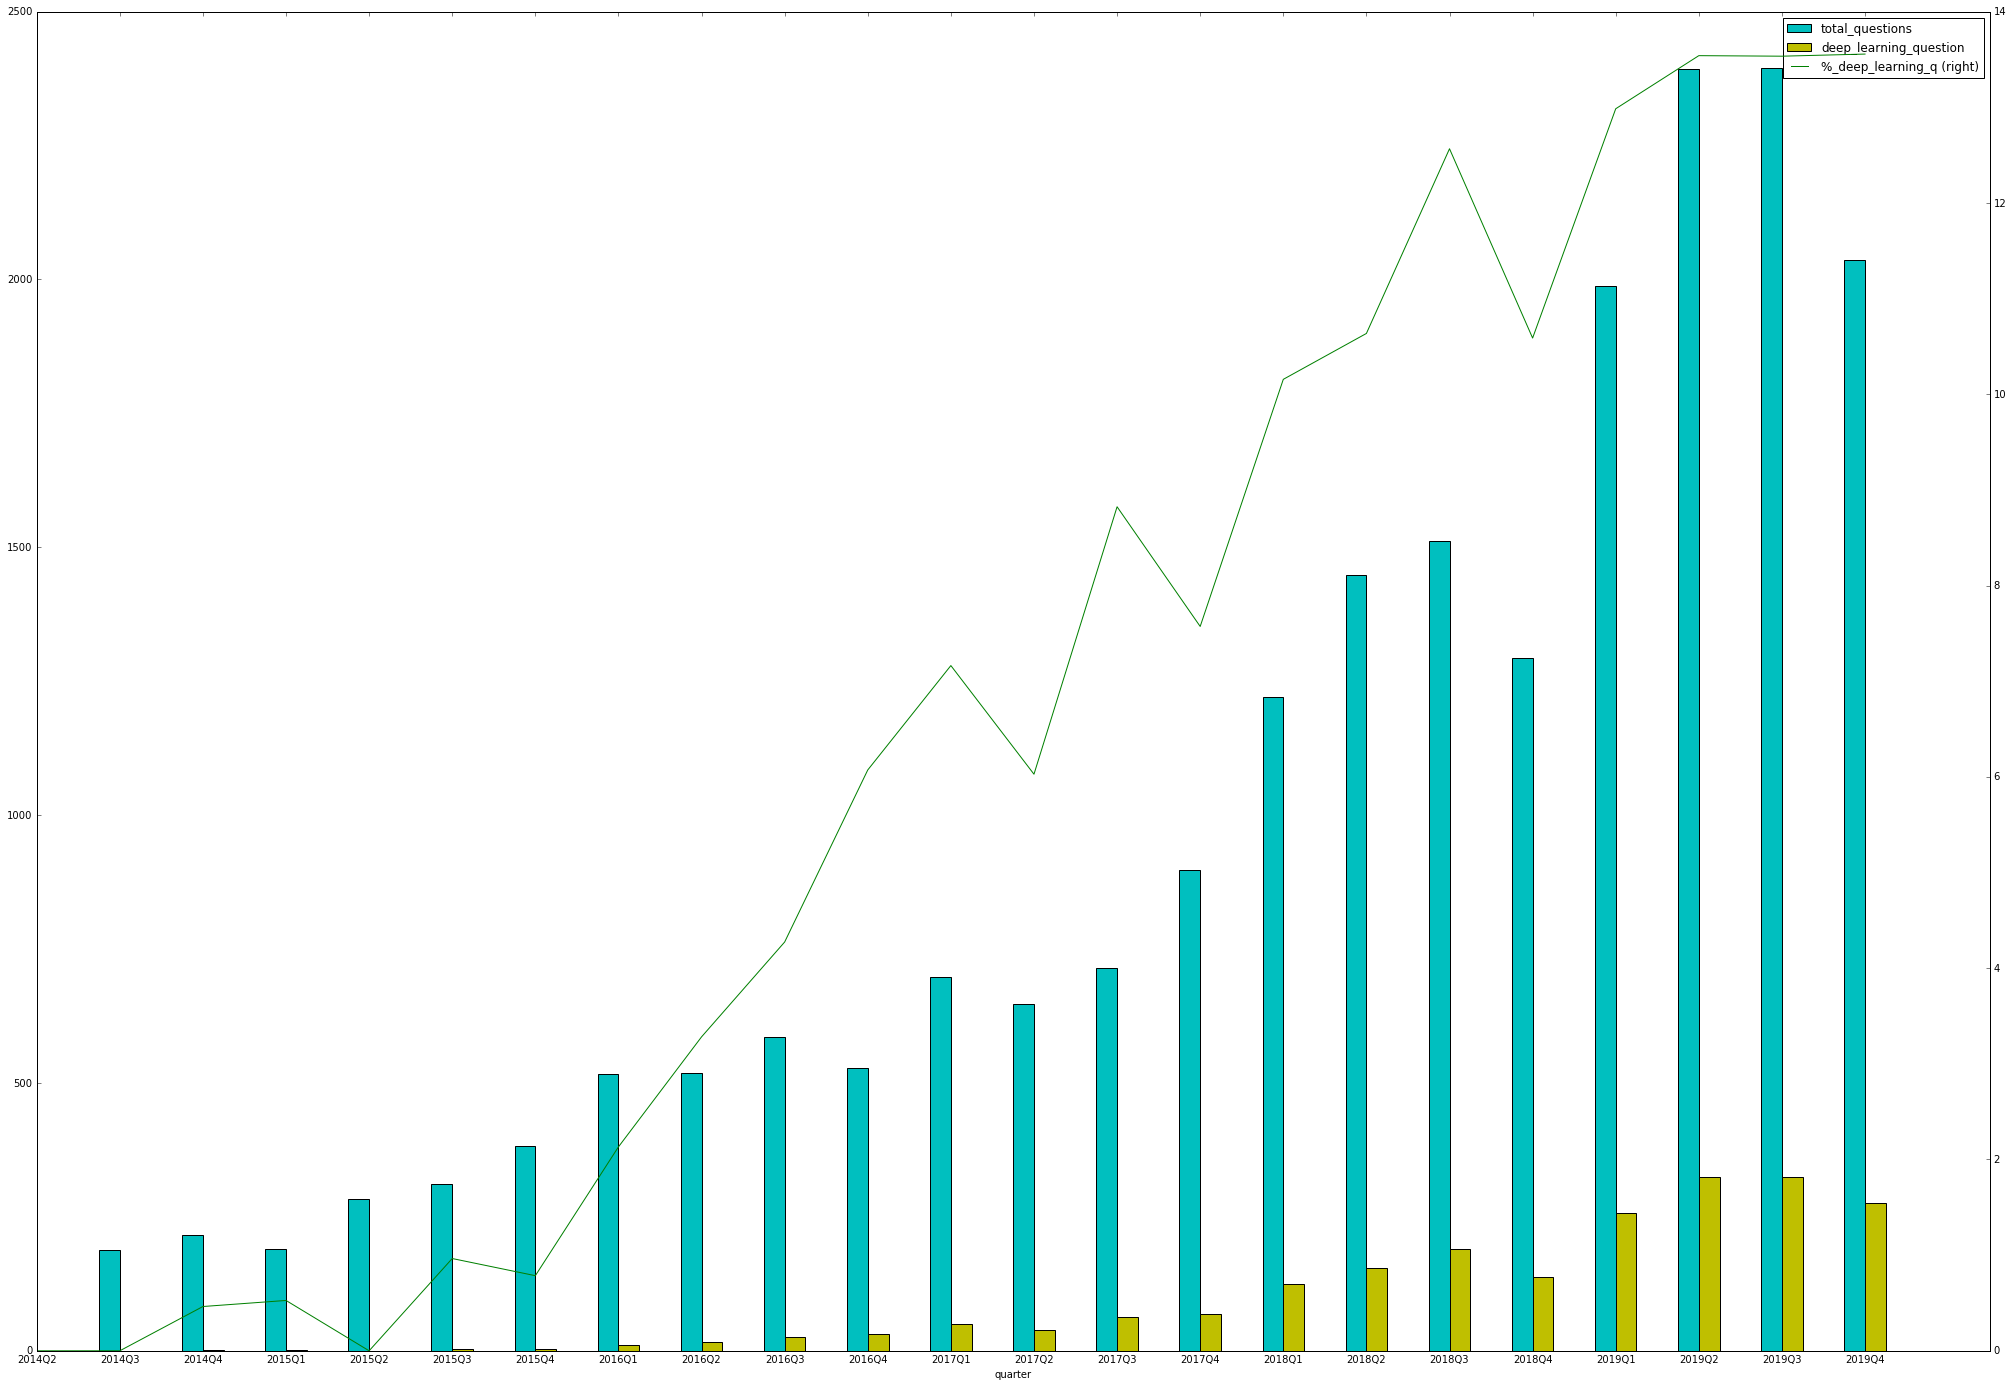

In [117]:

fig, ax = plt.subplots(figsize=(35,24))
quarterly_q.plot(kind='bar', x='quarter', y=['total_questions', 'deep_learning_question'], ax=ax, color = ['c','y'])
quarterly_q.plot(kind = 'line', x='quarter', y='%_deep_learning_q', secondary_y = True, ax=ax, alpha= 1 , color = 'g')
plt.xlim(0.0, 23.5)

plt.show()


## Conclusion and Recommendation ##
As we can see, interest in deep learning is growing rapidly by quarter. It is safe to recommend **deep-learning** as a topic of *high interest* in learning data scientists and therfore creating content on deep-learning will be beneficial for the course.